<a href="https://colab.research.google.com/github/Yazielbaralc1/Mineria_de_Datos.phyton-/blob/main/PIA_III_Equipo7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Equipo 7
#Grupo: 002, 3 frecuencias, miercoles de 19 a 22 hrs.
#1851004 Barbosa Alcocer Yaziel Gibran
#1597501 Castro Ramirez Aile del Carmen
#1555408 Medellin Martinez Edgar

#**Título de base de datos y poster.**

Company Bankruptcy Prediction

https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction

**Quebrando la quiebra**

Hacemos uso de librerías la cual es para visualización de datos, tratamientos, graficas, entrenamiento y testeo, así como también submuestreo de los datos y los modelos estadísticos que analizaremos.

In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz

import timeit
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, accuracy_score, recall_score, classification_report, f1_score, average_precision_score, precision_recall_fscore_support, roc_auc_score)

from imblearn.over_sampling import SMOTE

np.warnings.filterwarnings('ignore')
pd.set_option('max_columns', None)

import warnings

#Ignore warnings
warnings.filterwarnings(action='ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



#**Descripción de los datos.**

La quiebra es una situación jurídica, a la que una persona o empresa se puede apegar en caso de que no pueda pagar a sus acreedores debido a que los recursos económicos o activos en sus manos, no son suficientes. Una empresa puede irse a la quiebra por varias circunstancias, las cuales pueden ser tanto internas como externas. Es decir, algunas se gestan por una mala administración, y otras por situaciones ajenas.

Un mal manejo de las finanzas, como gastos excesivos o inversiones mal enfocadas, pueden llevar a una empresa al cierre. Sin embargo, también hay situaciones ajenas, como por ejemplo una falta de demanda debido a complicaciones financieras de los consumidores, como la situación que estamos viviendo con la pandemia de Covid-19.



# **Descripcion de Variables**


Los datos se obtuvieron del Taiwan Economic Journal para los años 1999 a 2009. La quiebra de la empresa se definió con base en las regulaciones comerciales de la Bolsa de Valores de Taiwán.

Las variables con las que trabaja esta base de datos son:
Y - ¿En quiebra ?: Etiqueta de clase

X1 - ROA (C) antes de intereses y depreciación antes de intereses: Rentabilidad sobre activos totales (C)

X2 - ROA (A) antes de intereses y% después de impuestos: Rentabilidad sobre activos totales (A)

X3 - ROA (B) antes de intereses y depreciación después de impuestos: Retorno sobre activos totales (B)

X4 - Margen bruto operativo: Ganancia bruta / Ventas netas

X5 - Ventas realizadas Margen bruto: Ganancia bruta realizada / Ventas netas

X6 - Tasa de ganancia operativa: Ingresos operativos / Ventas netas

X7 - Tasa de interés neta antes de impuestos: Ingresos antes de impuestos / Ventas netas

X8 - Tasa de interés neta después de impuestos: Ingresos netos / Ventas netas

X9 - Ingresos y gastos / ingresos no industriales: Relación de ingresos netos no operativos

X10 - Tasa de interés continua (después de impuestos): Ingresos netos - Excluir pérdidas o ganancias por enajenación / Ventas netas

X11 - Tasa de gastos operativos: Gastos operativos / Ventas netas

X12 - Tasa de gastos de investigación y desarrollo: (Gastos de investigación y desarrollo) / Ventas netas

X13 - Tasa de flujo de efectivo: Flujo de efectivo de los pasivos operativos / circulantes

X14 - Tasa de interés de la deuda que devenga intereses: Deuda que devenga intereses / Patrimonio

X15 - Tasa de impuestos (A): Tasa de impuestos efectiva

X16 - Valor neto por acción (B): Valor en libros Por acción (B)

X17 - Valor neto por acción (A): Valor en libros por acción (A)

X18 - Valor neto por acción (C): Valor en libros por acción (C)

X19 - BPA persistente en las últimas cuatro estaciones: BPA -Renta neta

X20 - Flujo de caja por acción

X21 - Ingresos por acción (Yuan ¥): Ventas por acción

X22 - Beneficio operativo por acción (Yuan ¥): Ingresos operativos por acción

X23 - Beneficio neto por acción antes de impuestos (Yuan ¥): Ingresos antes de impuestos por acción

X24 - Ventas brutas realizadas Tasa de
crecimiento de la utilidad 

X25 - Tasa de crecimiento de la utilidad de operación: Crecimiento de la utilidad de operación 

X26 - Tasa de crecimiento de la utilidad neta después de impuestos: Crecimiento de la
utilidad neta 

X27 - Tasa de crecimiento de la utilidad neta regular: Ingresos operativos continuos después del crecimiento de impuestos

X28 - Tasa de crecimiento de la utilidad neta continua: Ingresos netos -Excluyendo el crecimiento de pérdidas o ganancias por enajenación

X29 - Tasa de crecimiento de activos totales: Crecimiento de activos totales

X30 - Tasa de crecimiento de activos netos: Crecimiento de capital total

X31 - Tasa de crecimiento de retorno de activos totales: Retorno sobre el crecimiento de activos totales

X32 -% de reinversión en efectivo: índice de reinversión en efectivo

X33 - índice actual

X34 - índice rápido: prueba ácida

X35 - índice de gastos por intereses: gastos por intereses / ingresos totales

X36 - deuda total / patrimonio neto total: pasivo total / índice de capital

X37 - índice de deuda% : Pasivo / Activo total

X38 - Valor neto / Activo: Patrimonio / Activo total

X39 - Índice de idoneidad del fondo a largo plazo (A): (Pasivo a largo plazo + Patrimonio) / Activo fijo

X40 - Dependencia del endeudamiento: Costo de la deuda que devenga intereses

X41 - Pasivos contingentes / Patrimonio neto: Pasivo contingente / Patrimonio

X42 - Beneficio operativo / Capital pagado: Ingresos operativos / Capital

X43 - Beneficio neto antes de impuestos / Capital pagado: Ingresos antes de impuestos / Capital

X44 - Inventario y cuentas por cobrar / Valor neto: (Inventario + Cuentas por cobrar) / Patrimonio

X45 - Rotación de activos totales

X46 - Rotación de cuentas por cobrar

X47 - Días de cobro promedio: Días por cobrar pendientes

X48 - Tasa de rotación de inventarios (veces)

X49 - Rotación de activos fijos Frecuencia

X50 - Tasa de rotación del patrimonio neto (veces):
Rentabilidad del capital X51 - Ingresos por persona: Ventas por empleado

X52 - Beneficio operativo por persona: Ingresos operativos por empleado

X53 - Tasa de asignación por persona: Activos fijos por empleado

X54 - Capital de trabajo al total Activos

X55 - Activos rápidos / Activos totales

X56 - Activos corrientes / Activos totales

X57 - Efectivo / Activos totales

X58 - Activos rápidos / Pasivo corriente

X59 - Efectivo / Pasivo corriente

X60 - Pasivo corriente a activos

X61 - Fondos operativos a pasivo

X62 - Inventario / Capital de trabajo

X63 - Inventario / Pasivo corriente

X64 - Pasivo corriente / Pasivo

X65 - Capital de trabajo / Patrimonio

X66 - Pasivo corriente / patrimonio

X67 - Pasivo a largo plazo con activos corrientes

X68 - Utilidades retenidas con el activo total

X69 - Ingreso total / gasto total

X70 - Gasto / activo total 

X71 - Tasa de rotación del activo corriente: Activo corriente a ventas

X72 - Rotación rápida de activo Tasa: Activos rápidos a ventas

X73 - Tasa de rotación del capital de trabajo: Capital de trabajo a ventas

X74 - Tasa de rotación de efectivo: Efectivo a ventas

X75 - Flujo de efectivo a ventas

X76 - Activos fijos a activos

X77 - Pasivo corriente a pasivo

X78 - Pasivo corriente a patrimonio

X79 - Patrimonio a pasivo a largo plazo

X80 - Flujo de efectivo a activos totales

X81 - Flujo de efectivo a pasivo

X82 - CFO a activos

X83 - Flujo de efectivo a patrimonio

X84 - Pasivo corriente a activos corrientes

X85 - Pasivo-Activos Marca: 1 si el pasivo total 
excede los activos totales, 0 en caso contrario

X86 - Ingresos netos a activos totales

X87 - Activos totales a precio PNB

X88 - Intervalo sin crédito

X89 - Utilidad bruta a ventas

X90 - Utilidad neta a capital contable 

X91 - Pasivo a capital

X92 - Grado de apalancamiento financiero (DFL)

X93 - Coeficiente de cobertura de intereses (Gastos 
por intereses a EBIT)

X94 - Marcador de ingresos netos: 1 si los ingresos netos son negativos durante los últimos dos años, 0 en caso contrario

X95 - Patrimonio a pasivo

In [2]:
df=pd.read_csv("data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Aquí se aprecia que la mayoría de nuestros datos son flotantes y no existen datos nulos en ninguna columna.

#**Justificación del uso de datos.**

Se selecciono esta base de datos pensando en lo interesante que es el estudio del quiebre de cualquier tipo de empresa, las características que comparten, así como el conocer los indicadores críticos para que una empresa pase de la estabilidad a la quiebra.

Nos interesa principalmente el conocer más a fondo el comportamiento interno de una empresa en quiebre o con una situación delicada.

Al identificar factores propios de una empresa en quiebre se espera identificar, corregir y evitar dichos factores.


#**Objetivos.**
Principal;

* Identificar patrones para predecir el quiebre de una empresa.

Secundarios;

* Determinar un modelo predictible con datos sesgados.
* Determinar que categorías tienen mayor peso en determinar una empresa en quiebre.




#**Limpieza de datos.**

In [3]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

Un problema con esta base de datos que al querer reindexar u organizar por columnas los datos aparecen como vacíos, por ello se lleva un mayor tratamiento de datos diferente.

#**Análisis Exploratorio de Datos.**

In [4]:
print(df['Bankrupt?'].value_counts())
print('Empresas estables ', round(df['Bankrupt?'].value_counts()[0]/len(df) * 100,1), '% de los datos.')
print('Empresas en Banca Rota: ', round(df['Bankrupt?'].value_counts()[1]/len(df) * 100,1), '% de los datos')

0    6599
1     220
Name: Bankrupt?, dtype: int64
Empresas estables  96.8 % de los datos.
Empresas en Banca Rota:  3.2 % de los datos


Esto se realiza para contabilizar y separar las empresas en quiebra de las que no lo están.

Nótese que tenemos 6599 datos que representan un 98.6% de las empresas estables y sólo 220 que representa un 3.2% de los datos.

Veamos esta distribución binaria en una gráfica ya que esta es nuestra variable predictora la cual debe de ser binaria (YES/NO).

Text(0.5, 1.0, 'Objetivo - Banca Rota?')

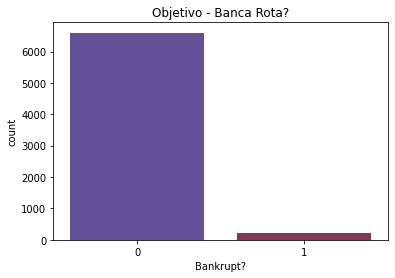

In [5]:
sns.countplot(x=df['Bankrupt?'],palette='twilight')
plt.title('Objetivo - Banca Rota?')

Comprobamos un sesgo en las empresas estables. Esto es un gran problema ya que el modelo que deseamos implementar podría verse afectado en una sobre confianza del modelo, pero no una buena confianza en sí de predecir las empresas inestables.

In [6]:
print(df[' Borrowing dependency'].describe())

count    6819.000000
mean        0.374654
std         0.016286
min         0.000000
25%         0.370168
50%         0.372624
75%         0.376271
max         1.000000
Name:  Borrowing dependency, dtype: float64


Al ver cómo se comporta la columna *Borrowing dependency* podemos realizar especulaciones sobre nuestro primer objetivo secundario, ya que el promedio es aproximadamente de 0.37 se esperaría que una empresa en quiebra dependa de más del 0.37 de préstamos.

In [7]:
print(df[' Persistent EPS in the Last Four Seasons'].describe())

count    6819.000000
mean        0.228813
std         0.033263
min         0.000000
25%         0.214711
50%         0.224544
75%         0.238820
max         1.000000
Name:  Persistent EPS in the Last Four Seasons, dtype: float64


Al ver cómo se comporta la columna *Persistent EPS in the Last Four Seasons* podemos realizar especulaciones sobre nuestro segundo objetivo secundario, ya que el promedio es aproximadamente de 0.23 se esperaría que las ganancias de las acciones de una empresa en quiebra tiendan a bajar.

#**Gráficas.**

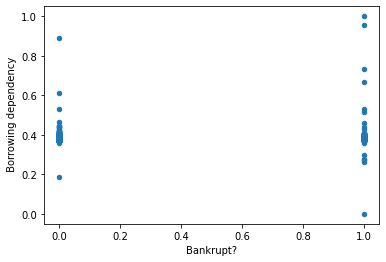

In [8]:
df[df['Bankrupt?'] >= 0].plot.scatter(x='Bankrupt?', y=' Borrowing dependency')

Esta grafica nos indica que tan dependiente de prestamos es una empresa.

Sorpresivamente una empresa que depende de prestamos no necesariamente se considerada en quiebra, ya que la mayoria de los datos de todas las empresas se acercan al 0.4 de dependencia de prestamos.

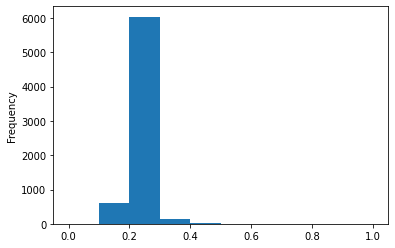

In [9]:
df[' Persistent EPS in the Last Four Seasons'].plot.hist()

La mayoría de las empresas presenta una alta ganancia por acciones, ya que la mayoría de las empresas de nuestra base de datos no están en quiebra podemos asumir que esta es una característica propia de las mismas.

Como hemos visto, no se le puede dar una limpieza a los datos de una manera simple y tenemos un sesgo en nuestra variable predictora.

Por ello es necesarios hacer un EDA para poder ver que categorías son las menos importantes y darnos una idea de que podríamos analizar.

Comenzamos con nuestra variable predictora.

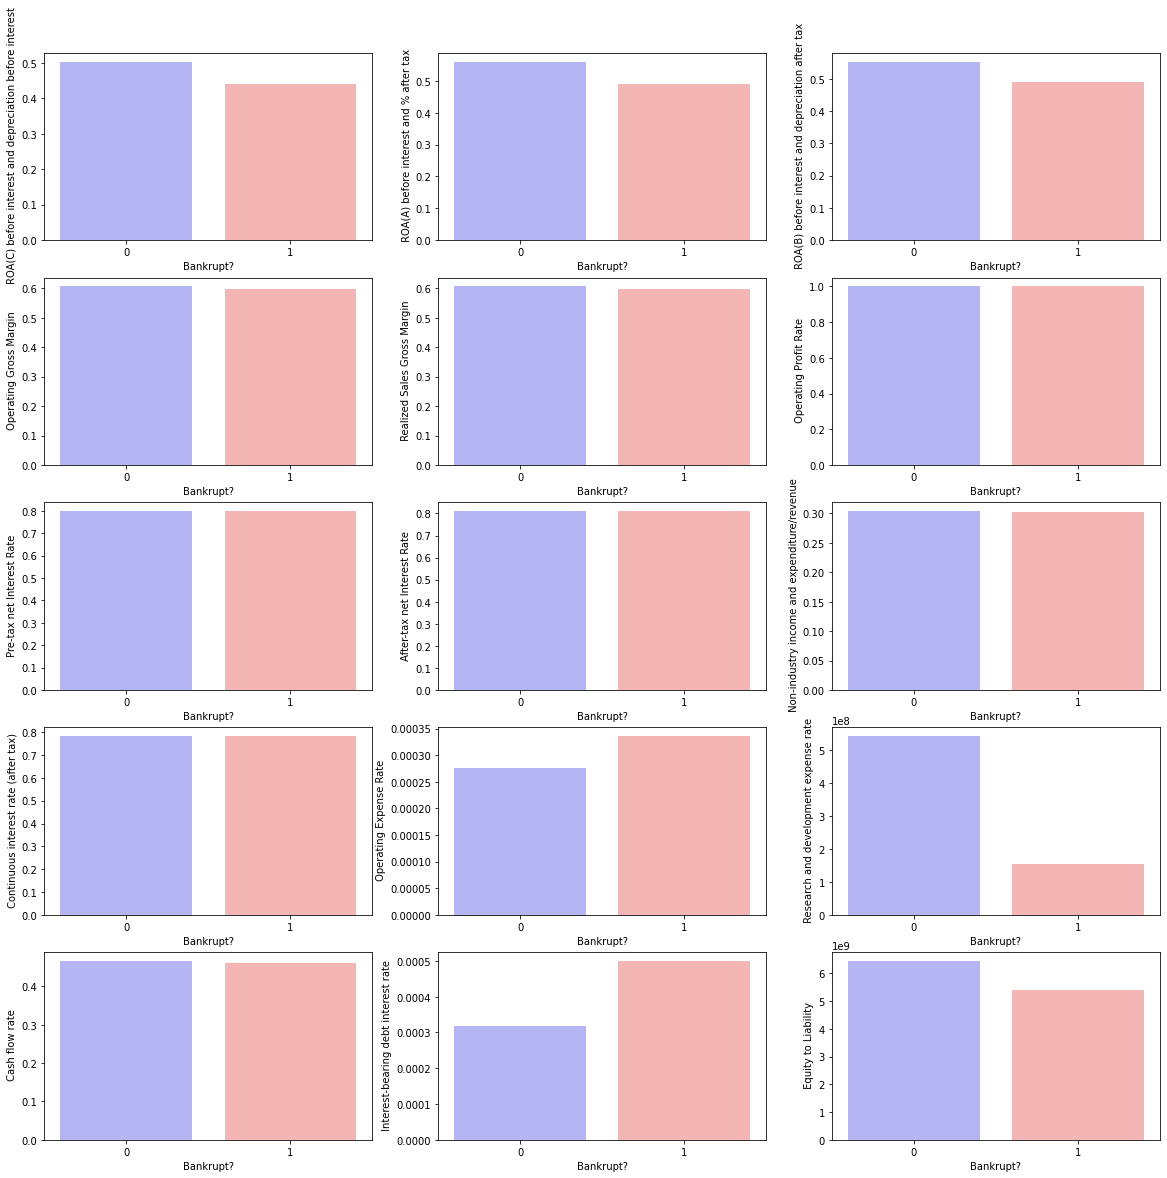

In [11]:
central = df.groupby('Bankrupt?').median().reset_index()
features = list(central.keys()[1:])

fig, ax = plt.subplots(5,3, figsize=(20,20))

ax = ax.ravel()
position = 0

for i in features:
  sns.barplot(data=central, x='Bankrupt?', y=i, ax=ax[position], palette='bwr')
  if position < 14:
    position += 1   
plt.show()

In [12]:
display(central)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0,0.504314,0.561219,0.553563,0.606235,0.606228,0.999025,0.797468,0.809379,0.303527,0.781639,0.000276,543000000.0,0.465305,0.000317,0.081587,0.185074,0.185074,0.185074,0.225111,0.322664,0.027618,0.104633,0.180236,0.022103,0.848045,0.689442,0.689442,0.217598,6.440000e+09,0.000463,0.264057,0.380621,0.010771,0.007579,0.630703,0.005377,0.109381,0.890619,0.005683,0.372474,0.005366,0.104556,0.179021,0.400052,0.119940,0.000970,0.006570,7.335294e-04,0.000583,0.029516,0.018539,0.396079,0.007734,0.811822,0.388945,0.516664,0.077684,0.008084,0.005070,0.081072,0.349002,0.277179,0.006576,0.807284,0.736072,0.329596,0.001863,0.938058,0.002343,0.022539,0.000198,0.000222,0.593964,1.060000e+09,0.671574,0.194586,0.807284,0.329596,0.112228,0.645618,0.459830,0.594324,0.315010,0.027133,0,0.811492,0.002063,0.623887,0.606233,0.841232,0.278671,0.026810,0.565259,1,0.034486
1,1,0.441330,0.490215,0.488597,0.598802,0.598899,0.998899,0.797156,0.809092,0.303347,0.781347,0.000335,154500000.0,0.461268,0.000499,0.000000,0.158021,0.158021,0.158021,0.195944,0.317164,0.018913,0.090343,0.155306,0.022061,0.847986,0.689154,0.689176,0.217569,5.420000e+09,0.000396,0.263724,0.375685,0.006029,0.002751,0.630283,0.015723,0.187426,0.812574,0.005160,0.382655,0.005366,0.090360,0.154012,0.404001,0.083958,0.000945,0.006757,5.160000e+07,0.001225,0.031129,0.020299

AQUI PODEMOS VER UN ANALISIS SIMPLE EN EL CUAL SI UNA EMPRESA TIENE:

*   Una **alta** Tasa de interés de la deuda que devenga interés (Interest-bearing debt interest rate), es propensa a ser inestable.
*   Una **alta** Deuda total / Patrimonio neto total (Total debt/Total net worth), es propensa a ser inestable.
*   Una **baja** Frecuencia de rotación de activos fijos (Fixed Assets Turnover Frequency), es propensa a ser inestable.
*   Un **bajo** Efectivo / Activos totales (Cash/Total Assets), es propensa a ser inestable. 
*   Una baja Equidad a la responsabilidad (Equity to Liability), es propensa a ser inestable.


Veamos nuestras variables categóricas en un histograma.

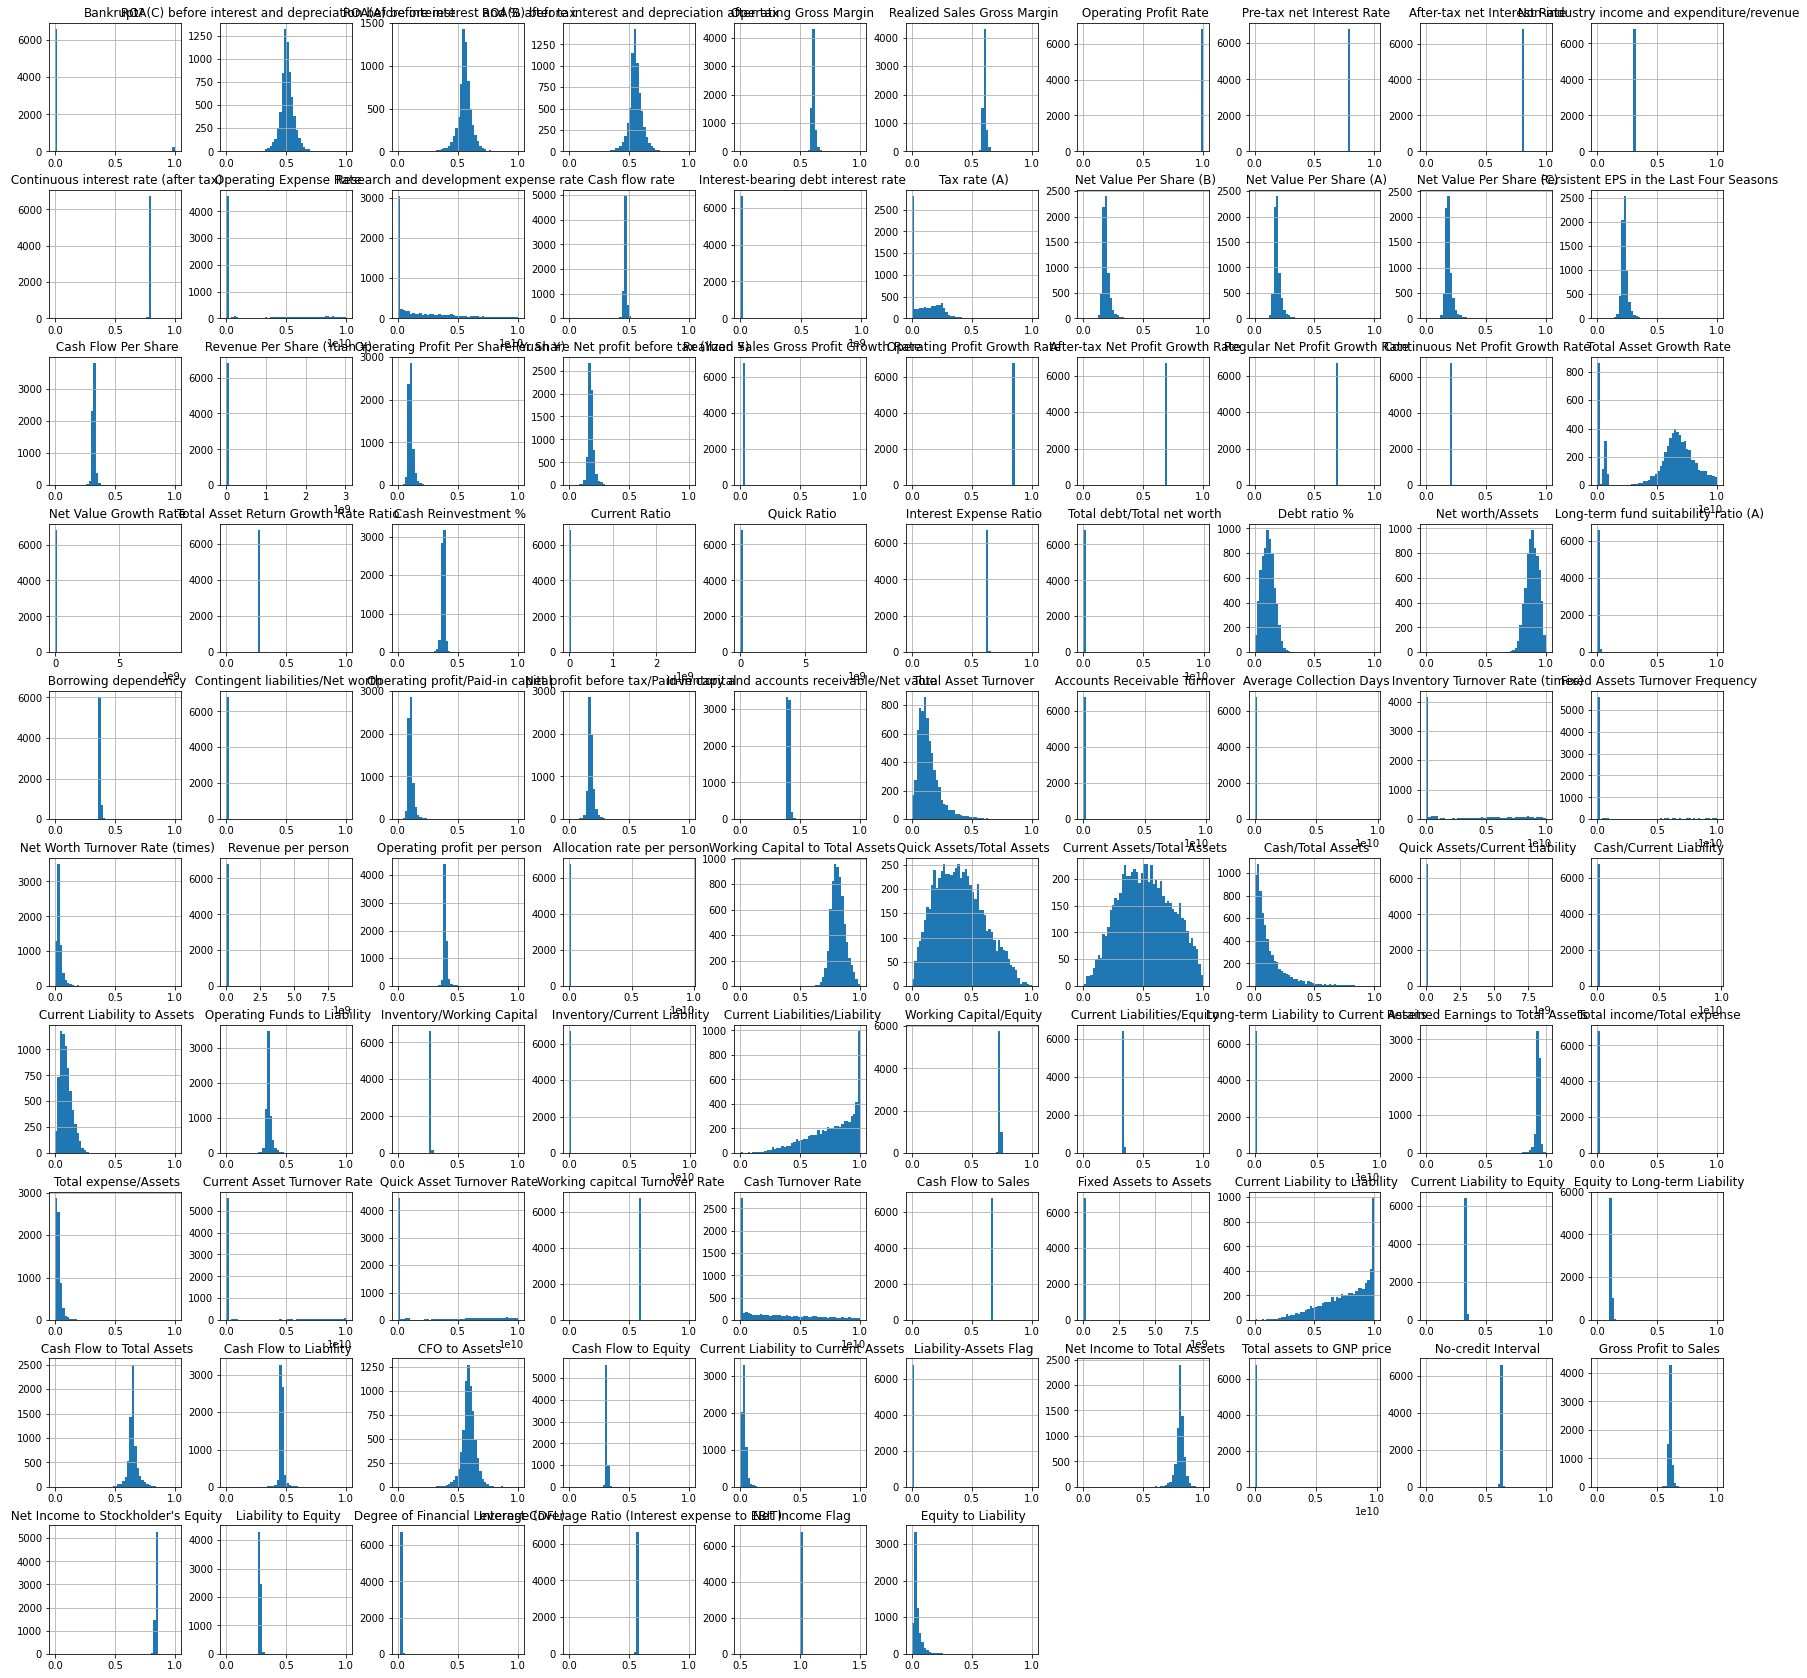

In [13]:
df.hist(figsize = (30,30), bins = 50 )
plt.show()

Aquí podemos ver que nuestros datos están sesgados y nada escalados o entadarizados.

Intentaremos hacer el modelo con los datos sesgados y con datos atípicos para ver que categorías son las que mayor coeficiente de relación tienen y así tener más clara nuestra función logarítmica, sin embargo, nos dimos cuenta de que al usar logit la no nos calcula el modelo de esa manera ya que nos dice error de singular index.

Por lo que nuestro objetivo es demostrar que aplicando un submuestreo en esta base de datos es mejor además de demostrar un método en cual podamos ver que categorías son las más importantes en base de datos no tan manipulables y complejas como éstas.


In [16]:
correlation_matrix = df.corr()
correlation_matrix.style.background_gradient(sns.light_palette('red', as_cmap=True))

Aquí se puede ver que tenemos una gran concentración de datos atípicos en cada distribución, por lo cual sería una buena idea quitar las categorías que tengan una relación débil.

In [17]:
correlation_matrix = correlation_matrix.iloc[1:,1:]
drop_correlated_fea = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if(correlation_matrix.iloc[i,j] >= 0.9 or correlation_matrix.iloc[i,j] <= -0.9):
            if correlation_matrix.columns[j] not in drop_correlated_fea:
                drop_correlated_fea.append(correlation_matrix.columns[j]) 

Véase las categorías menos importantes.

In [18]:
print(len(drop_correlated_fea))
drop_correlated_fea

20


[' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' Operating Gross Margin',
 ' Operating Profit Rate',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Persistent EPS in the Last Four Seasons',
 ' After-tax Net Profit Growth Rate',
 ' Debt ratio %',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Working capitcal Turnover Rate',
 ' Current Liabilities/Liability',
 ' Current Liabilities/Equity',
 ' ROA(B) before interest and depreciation after tax',
 ' Realized Sales Gross Margin',
 ' Borrowing dependency',
 ' Current Liability to Equity']

In [21]:
lef=df.drop(drop_correlated_fea,axis=1)

#**Técnica de minería.**

* **Regresión logística**

Procedemos a aplicar el modelo de regresión logística para poder ver la importancia de usar SMOTE.

In [22]:
def preprocess_inputs(ef):
    ef = ef.copy()  

    # Separamos las variables binarias con las categóricas
    y = ef['Bankrupt?']
    X = ef.drop('Bankrupt?', axis=1)
    
    # Entrenamos nuestras variables a un 80% de entrenamiento y de testeo un 20%
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, shuffle=True, random_state=1, stratify = y)
    
    # Escalamos las variables catgóricas
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [23]:
X_train, X_test, y_train, y_test = preprocess_inputs(lef)
print('X entreamiento' , X_train.shape)
print('X testeo' , X_test.shape)
print('y entrenamiento ' , y_train.shape)
print('y testeo' , y_test.shape)

X entreamiento (5455, 75)
X testeo (1364, 75)
y entrenamiento  (5455,)
y testeo (1364,)


Aquí obtenemos que nuestras variables de entrenamiento:

*   X_entrenamiento utilizó 5455 datos de 75 columnas
*   X_testeo utilizó 1364 datos de 75 columnas
*   y entrenamiento utilizó 5455 binarios de nuestra columna Bankrupt?
*   y testeo utilizó 1364 binarios de nuestra columna    Bankrupt?


In [24]:
model_logistic=  LogisticRegression(solver = "liblinear", l1_ratio = 0.5)
model_logistic.fit(X_train, y_train)
resultado = model_logistic.score(X_test, y_test)
y_test_pred = model_logistic.predict(X_test)
arg_test = {'y_true':y_test, 'y_pred':y_test_pred}
print(confusion_matrix(**arg_test))
print(classification_report(**arg_test))
print('Nuestro modelo de Regresión Logística' + ': {:.5f}%'.format(resultado * 100))

[[1310   10]
 [  39    5]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1320
           1       0.33      0.11      0.17        44

    accuracy                           0.96      1364
   macro avg       0.65      0.55      0.58      1364
weighted avg       0.95      0.96      0.96      1364

Nuestro modelo de Regresión Logística: 96.40762%


Viendo ahora nuestra matriz de confusión con las variables categóricas ya modeladas vemos:

*   Precisión buena de los dictámenes Estables
*   Deseable precisión en los dictámenes Inestables

Sin embargo, nos calcula un buen porcentaje de Efectividad, esto es un claro ejemplo de porque debemos insesgar los datos binarios de nuestra base de datos.


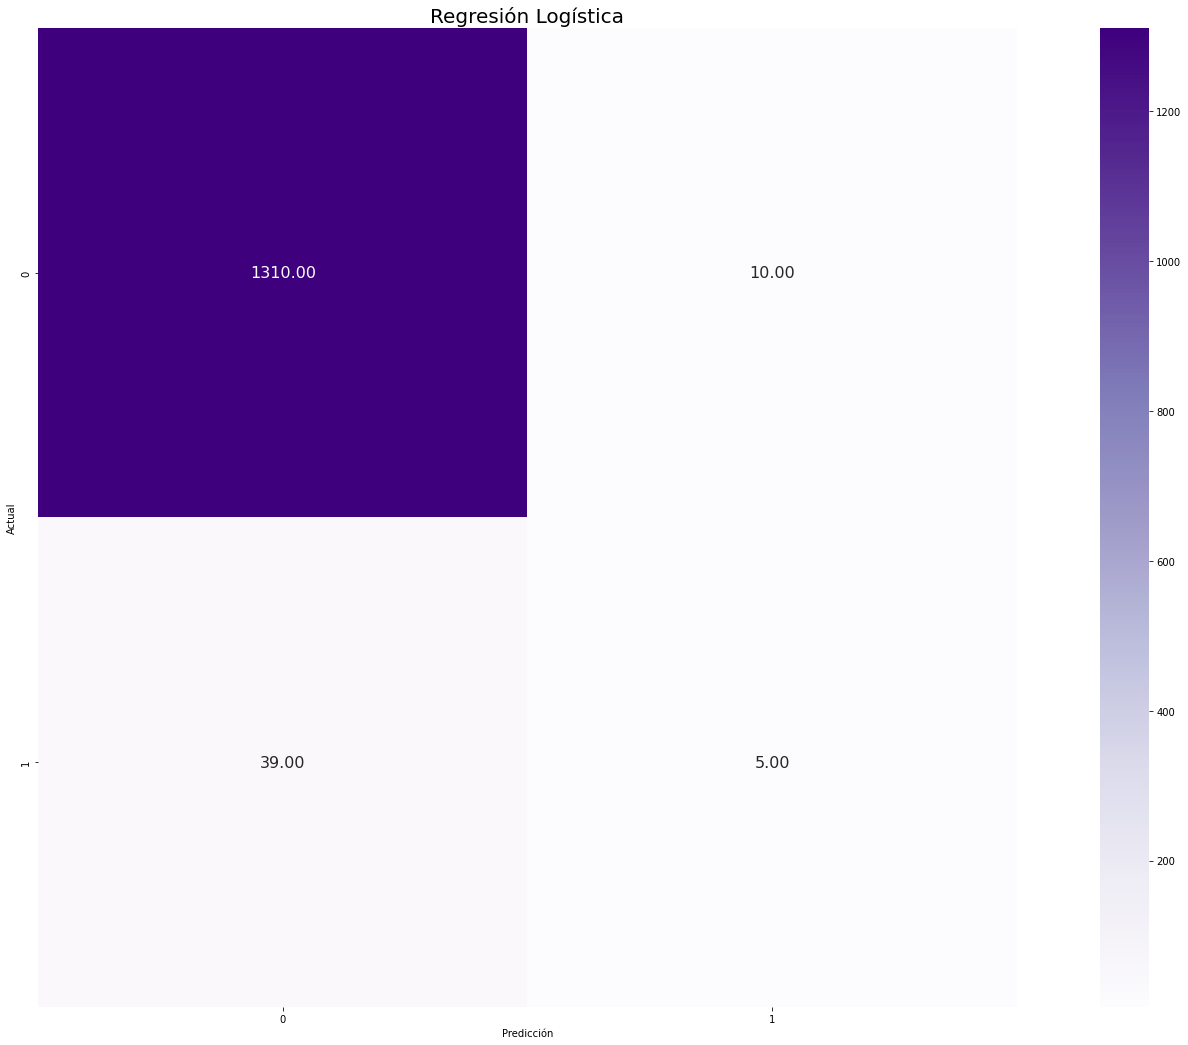

In [29]:


fig = plt.figure(figsize=(30, 18))

original_results_smote = model_logistic.score(X_test, y_test)
y_test_pred_smote = model_logistic.predict(X_test)
arg_test = {'y_true':y_test, 'y_pred':y_test_pred_smote}

conf_mx0 = confusion_matrix(y_test, y_test_pred_smote)

heat_cm0 = pd.DataFrame(conf_mx0, columns=np.unique(y_test), index = np.unique(y_test))
heat_cm0.index.name = 'Actual'
heat_cm0.columns.name = 'Predicción'


fig.subplots_adjust(left=None, bottom=None, right= None, top=None, wspace=0.4, hspace= 0.4)
sns.heatmap(heat_cm0, annot=True, fmt='.2f', square=True, annot_kws={"size": 16}, cmap = 'Purples').set_title('Regresión Logística', fontsize = 20)


plt.show()

Ahora bien, como queremos una exactitud factible, deberemos ver en nuestra Multicolinealidad de nuestros datos. La Multicolinealidad que existe una fuerte correlación entre las variables independientes que predicen la variable dependiente en un modelo de regresión. En tal caso, no se puede determinar cuánto efecto tienen las variables independientes sobre las variables dependientes individualmente. La multicolinealidad está determinada por el Factor de Inflación de Varianza (*Variance Inflation Factor*) y esta relación proviene de la correlación entre variables independientes. Generalmente, una puntuación de VIF por encima de 5 indica la presencia de multicolinealidad. En este caso, se sugiere como solución eliminar del modelo una de las variables relacionadas entre sí. Debido al uso de muchas funciones en los métodos de aprendizaje automático, puede haber algunas funciones superpuestas. Las características que se superponen con este análisis deben identificarse y excluirse del análisis.

Si bien nos dimos cuenta de que nuestra variable predictora tiene un sesgo. Para ello, utilizaremos la herramienta SMOTE.

La técnica de sobremuestreo de minorías sintéticas o SMOTE es una técnica de sobremuestreo, pero SMOTE funciona de manera diferente a su sobremuestreo típico.

En una técnica de sobremuestreo clásica, los datos minoritarios se duplican a partir de la población de datos minoritarios. Funciona utilizando un algoritmo de vecino k-más cercano para crear datos sintéticos. SMOTE primero comienza eligiendo datos aleatorios de la clase minoritaria, luego se establecen los k vecinos más cercanos de los datos. Los datos sintéticos se harían entonces entre los datos aleatorios y el vecino k más cercano seleccionado al azar.


In [30]:
def preprocess_inputs(ef):
    ef = ef.copy()

    # Separamos las variables binarias con las categóricas
    y = ef['Bankrupt?']
    X = ef.drop('Bankrupt?', axis=1)
    
    # Entrenamos nuestras variables a un 80% de entrenamiento y de testeo un 20%
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, shuffle=True, random_state=1, stratify = y)
    
    # Escalamos las variables catgóricas
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [31]:
def preprocess_inputs(df_):
    df_ = df_.copy()
    
    # Separamos las variables predictoras y las variables categóricas
    y_ = df_['Bankrupt?']
    X_ = df_.drop(['Bankrupt?'], axis=1)

    #Inicializamos el submuestreo con la herramienta SMOTE

    sm = SMOTE(random_state = 42)
    X_smote, y_smote = sm.fit_resample(X_, y_)

    sm = SMOTE(random_state = 42)
    X_test_oversampled, y_test_oversampled = sm.fit_resample(X_smote, y_smote)
    X_smote = pd.DataFrame(X_test_oversampled, columns=X_.columns)
    
    # Entrenamos nuestras variables de entrenamiento y testeo ya submuestradas
    X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, train_size = 0.8, test_size = 0.2, random_state=1, shuffle=True, stratify = y_smote)
    
    # Escalamos las variables categóricas.
    scaler = StandardScaler()
    scaler.fit(X_train_smote)
    X_train_smote = pd.DataFrame(scaler.transform(X_train_smote), index=X_train_smote.index, columns=X_train_smote.columns)
    X_test_smote = pd.DataFrame(scaler.transform(X_test_smote), index=X_test_smote.index, columns=X_test_smote.columns)
    
    return X_train_smote, X_test_smote, y_train_smote, y_test_smote, y_smote

In [32]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote, y_smote = preprocess_inputs(lef)

In [33]:
print('X_train_smote shape is ' , X_train_smote.shape) # Datos de entrenamiendo despues submuestrar
print('y_train_smote shape is ' , y_train_smote.shape) # Datos de entrenamiendo despues submuestrar
print('X_test_smote shape is ' , X_test_smote.shape) # Datos de testeo despues submuestrar
print('y_test_smote shape is ' , y_test_smote.shape) # Datos de testeo despues submuestrar

X_train_smote shape is  (10558, 75)
y_train_smote shape is  (10558,)
X_test_smote shape is  (2640, 75)
y_test_smote shape is  (2640,)


Aquí obtenemos que nuestras variables de entrenamiento:

*   X_entrenamiento utilizó 10558 datos de 75 columnas
*   X_testeo utilizó 10558 datos de columnas
*   y entrenamiento utilizó 2640 binarios de 75 columnas
*   y testeo utilizó 2640 binarios de nuestar columna


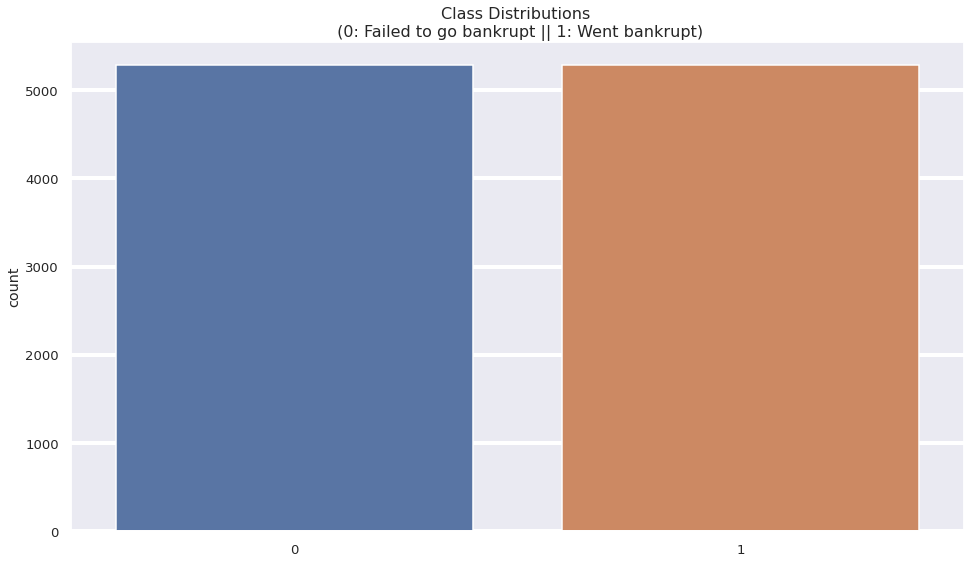

In [34]:
sns.set_theme(context = 'talk', style='darkgrid', palette='deep', font='sans-serif', font_scale = 0.8, rc={"grid.linewidth": 4})

plt.figure(figsize = (16,9))
sns.countplot(y_train_smote)
plt.title('Class Distributions \n (0: Estables || 1: Banca Rotas (Inestables))', fontsize=16)
plt.show()

In [35]:
model_smote=  LogisticRegression(solver = "liblinear", l1_ratio = 0.5)
model_smote.fit(X_train_smote, y_train_smote)
result_smote = model_smote.score(X_test_smote, y_test_smote)

y_test_pred_smote = model_smote.predict(X_test_smote)
arg_test = {'y_true':y_test_smote, 'y_pred':y_test_pred_smote}
print(confusion_matrix(**arg_test))
print(classification_report(**arg_test))

print('smote' + ': {:.5f}%'.format(result_smote * 100))

[[1177  143]
 [ 119 1201]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1320
           1       0.89      0.91      0.90      1320

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640

smote: 90.07576%


Aquí, gracias a la matriz de confusión, obtenemos que nuestras variables de entrenamiento:

*   Mayor predicción en los datos inestables y estables.
*   Disminución del intervalo de confianza del modelo, pero una más apegado a los datos insesgados.


Ahora vemos nuestro modelo de predicción con un porcentaje menor al anterior pero con unas precisiones más factibles.

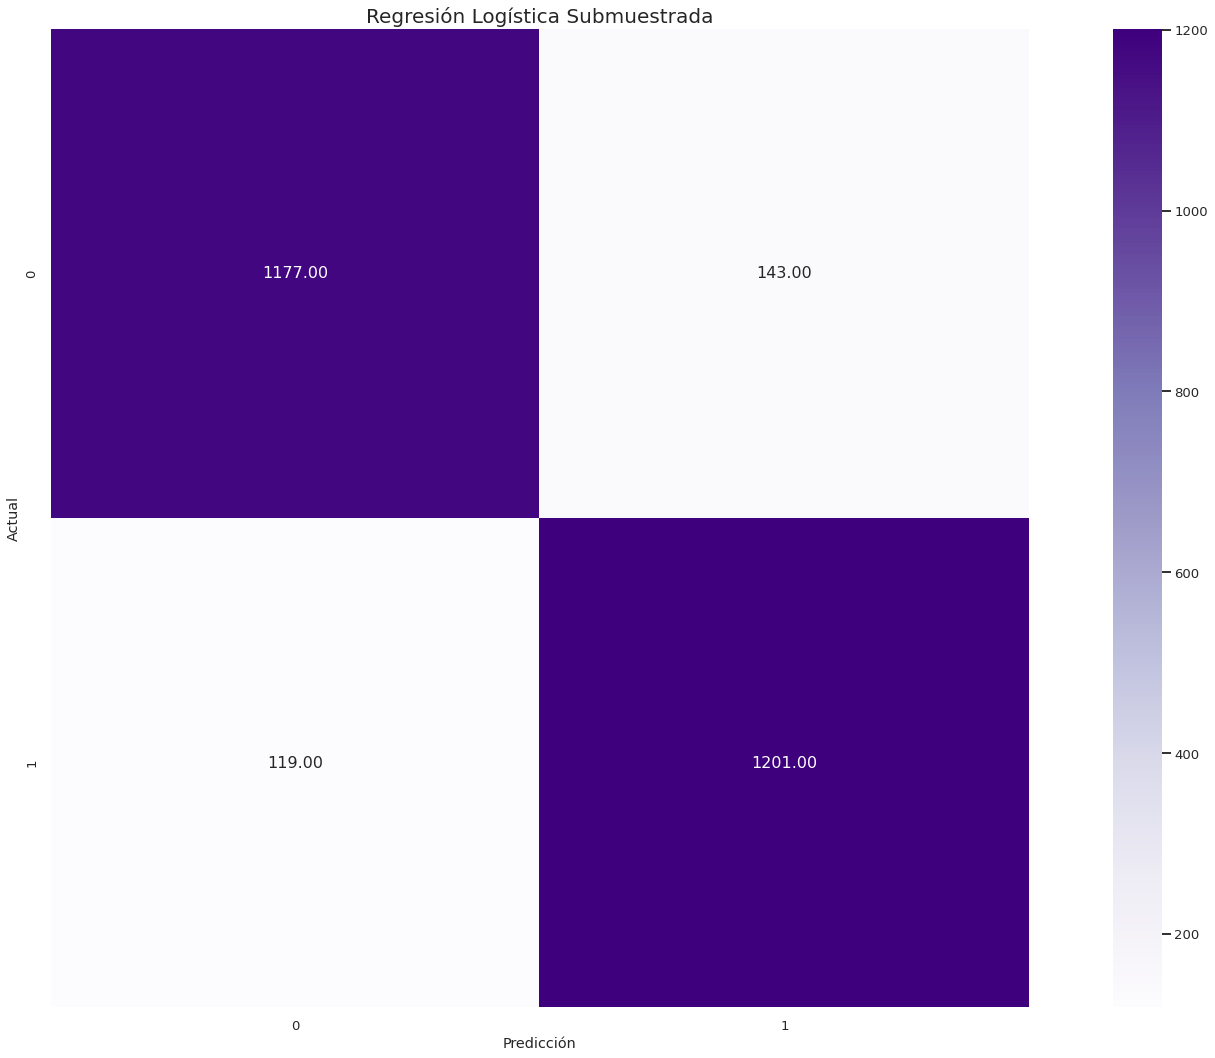

In [36]:

fig = plt.figure(figsize=(30, 18))


original_results_smote_st = model_smote.score(X_test_smote, y_test_smote)

y_test_pred_smote = model_smote.predict(X_test_smote)
arg_test = {'y_true':y_test_smote, 'y_pred':y_test_pred_smote}

conf_mx0 = confusion_matrix(y_test_smote, y_test_pred_smote)

heat_cm0 = pd.DataFrame(conf_mx0, columns=np.unique(y_test_smote), index = np.unique(y_test_smote))
heat_cm0.index.name = 'Actual'
heat_cm0.columns.name = 'Predicción'


fig.subplots_adjust(left=None, bottom=None, right= None, top=None, wspace=0.4, hspace= 0.4)
sns.heatmap(heat_cm0, annot=True, fmt='.2f', square=True, annot_kws={"size": 16}, cmap = 'Purples').set_title('Regresión Logística Submuestrada', fontsize = 20)


plt.show()

Esta curva de rendimiento diagnóstico nos ayudara a ver nuestro rendimiento de nuestro modelo.

La elección se realiza mediante la comparación del área bajo la curva (AUC) de ambas pruebas. Esta área posee un valor comprendido entre 0,5 y 1, donde 1 representa un valor diagnóstico perfecto y 0,5 es una prueba sin capacidad discriminatoria diagnóstica. Es decir, si AUC para una prueba diagnóstica es 0,8 significa que existe un 80% de probabilidad de que el diagnóstico realizado a un enfermo sea más correcto que el de una persona sana escogida al azar. Por esto, siempre se elige la prueba diagnóstica que presente una mayor área bajo la curva.

Nuestro modelo tiene un testeo **muy bueno** [0.9, 0.97).

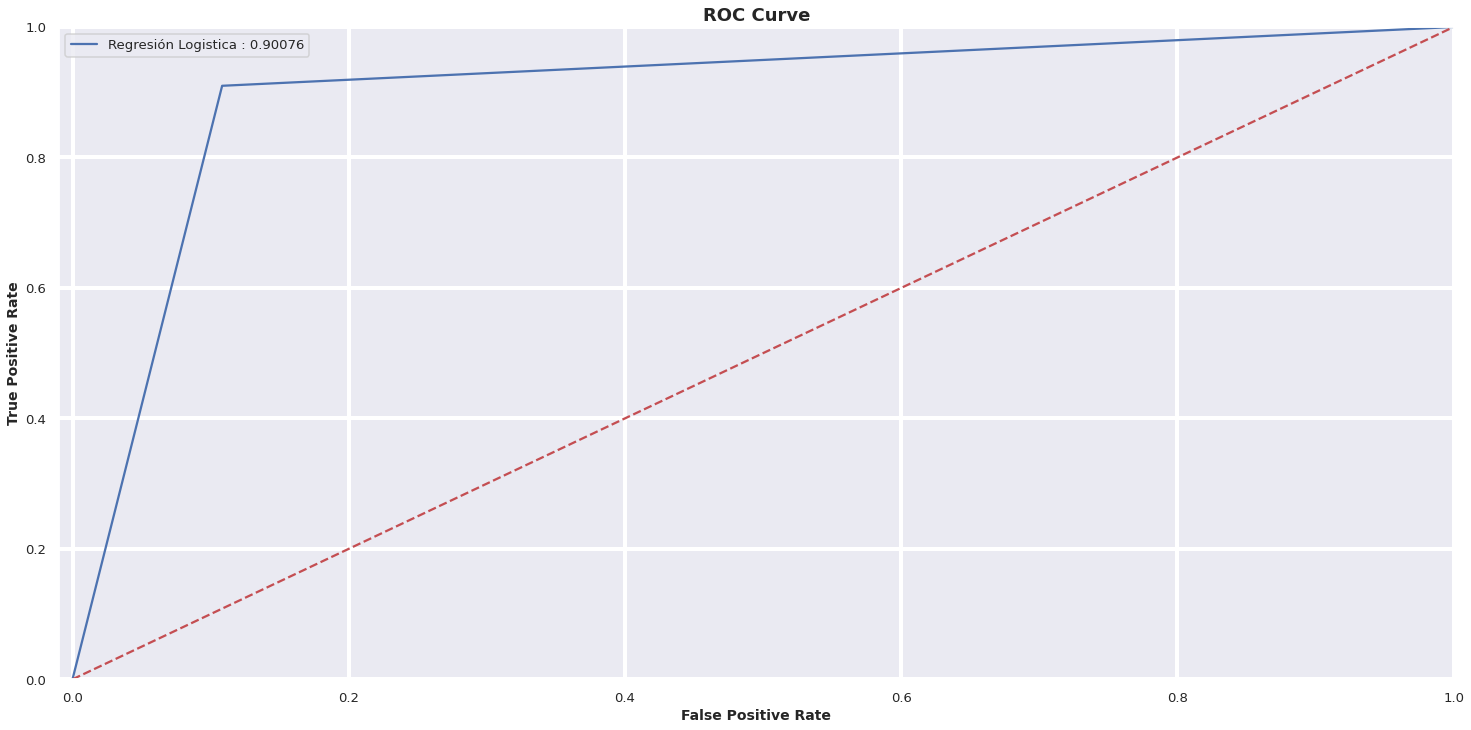

In [37]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
fig.set_size_inches(25,12)


y_pred = model_smote.predict(X_test_smote)
fpr, tpr, thresholds_nb = roc_curve(y_test_smote, y_test_pred_smote, pos_label=1)
roc_auc = auc(fpr, tpr)
precision_nb, recall_nb, th_nb = precision_recall_curve(y_test_smote, y_pred,pos_label=1)
plt.plot(fpr, tpr, label='Regresión Logistica : {:.5f}'.format(roc_auc_score(y_test_smote, y_pred)))

plt.plot([0, 1], [0, 1], 'r--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontweight='bold', fontsize=14)
plt.ylabel('True Positive Rate', fontweight='bold', fontsize=14)
plt.title('ROC Curve', fontweight='bold', fontsize=18)
plt.legend(loc='best')
plt.show()

* **Árboles de decisión.**

Intentaremos, con árboles de decisión, categorizar nuestras variables modeladas por regresión lineal submuestrada con SMOTE.

In [38]:
dtc= DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)
dtc.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
print("DTC Accuary:  {:.2f}%".format(dtc.score(X_train_smote,y_train_smote)*100))
print("DTC Accuary:  {:.2f}%".format(dtc.score(X_test_smote,y_test_pred_smote)*100))

DTC Accuary:  89.40%
DTC Accuary:  89.77%


/bin/bash: dot-Tpng: command not found
data.csv  sample_data  treel.dot


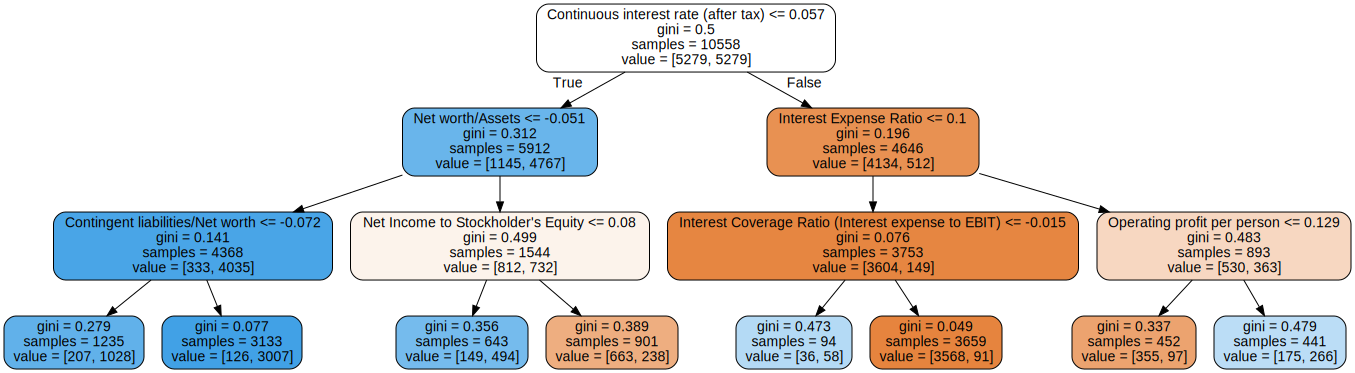

In [40]:
import graphviz
export_graphviz(dtc,'treel.dot', filled=True, feature_names= X_train_smote.columns, rounded=True)
!dot-Tpng 'treel.dot' -o 'treel.png'
!ls
with open("treel.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

Nuestro modelo de árboles de decisión junto a nuestra variable entrenada categórica submuestrada nos arroja las decisiones que tienen mayor injerencia en nuestros diagnósticos.

Por lo tanto, para que la empresa se clasifique como inestable tendiente a quiebra se concluye en:

1.   Tasa de interés continua (después de impuestos) es mayor a 0.057
2.   Ratio de gastos por intereses es mayor a o igual a 0.1
3.    Beneficio operativo por persona es igual o mayor a 0.129 

En cambio, para que la empresa se clasifique como estable se concluye en:

1.   Tasa de interés continua (después de impuestos) es menor o igual a 0.057
2.   Patrimonio neto / Activo menor o igual a -0.051
3.   Pasivos contingentes / Patrimonio neto menor o igual a -0.072


#**Conclusiones.**

Debido a nuestra complicación de manipular los datos de esta base, nuestros objetivos cambiaron. 


*  Al obtener datos sesgados en una base de datos es mejor submuestrar con la herramienta smote.
* El modelaje de regresión logística se complementa con el submuestreo para predecir una variable binaria.
*   Las categorías con peso en la decisión de saber si una empresa tiende a ser inestable es Tasa de interés continua (después de impuestos).
*   Las categorías que tienen mayor peso a que una empresa sea inestable son los ratios del Patrimonio neto / Activo y Pasivos contingentes / Patrimonio neto.
